In [41]:
import pandas as pd
import numpy as np

## Creating and standardising data

In [42]:
#Creating dataframe
df = pd.DataFrame(data = {'lab': ['A','B','C'],'var1':[1, 2, 3], 'var2':[0.9,2.22, 2.6]} )

In [6]:
X = df[['var1','var2']]

In [7]:
y = df[['lab']]

In [8]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [12]:
X_std

array([[-1.22474487, -1.38177845],
       [ 0.        ,  0.43008998],
       [ 1.22474487,  0.95168847]])

In [13]:
X_std.T

array([[-1.22474487,  0.        ,  1.22474487],
       [-1.38177845,  0.43008998,  0.95168847]])

## Covariance matrix and eigen vectors

In [14]:
features = X_std.T
covariance_mat = np.cov(features)
print(covariance_mat)

[[1.5        1.42895082]
 [1.42895082 1.5       ]]


In [15]:
eig_vals, eig_vecs = np.linalg.eig(covariance_mat)

In [16]:
print(eig_vals)

[2.92895082 0.07104918]


In [17]:
print(eig_vecs)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


## Finding variation explained by PCs and projecting points onto them

In [30]:
per = []
for i in eig_vals:
    print(i/sum(eig_vals 
    per.append(i/sum(eig_vals))

0.9763169387705757
0.023683061229424325


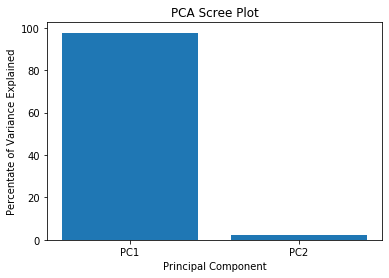

In [36]:
percent_variance = []
percent_variance.append(np.round(per[0]* 100, decimals =2))
percent_variance.append(np.round(per[1]* 100, decimals =2))
columns = ['PC1','PC2']
plt.bar(x= range(1,3), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [19]:
eig_vecs1 = eig_vecs[0:1,:]
eig_vecs1.shapes

(1, 2)

In [38]:
X_std.shape

(3, 2)

In [40]:
eig_vecs1.shape

(1, 2)

In [20]:
projected_X = X_std.dot(eig_vecs1.T)

In [21]:
projected_X

array([[ 0.11103951],
       [-0.30411954],
       [ 0.19308004]])

## Visualising results

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [28]:
result = pd.DataFrame(projected_X[:,0:1], columns = ['PC1'])
result['y'] = 0
result['label'] = y

Text(0.5, 1, 'PCA Result')

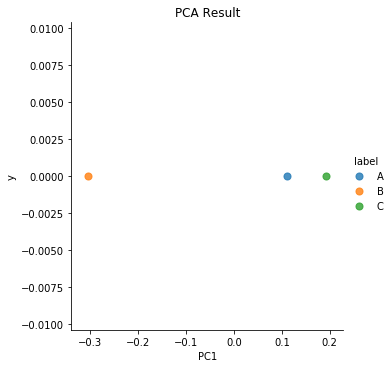

In [29]:
sns.lmplot('PC1','y',data = result, fit_reg = False, scatter_kws = {"s" : 50}, hue = "label")
plt.title("PCA Result")